In [1]:
import pandas as pd
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, skew
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Analisis Exploratorio

In [2]:
#Cargamos los datos
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

#####De lo anterior podemos observar que tenemos 7043 observaciones y 21 caracterisiticas

In [4]:
#A continuacion se presentan algunos detalles estadisticos. 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#Contando la cantidad de datos
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


######De lo anterior podemos ver que TotalCharges esta en object, por ende debemos convertirlo en numerico

In [7]:
#Convirtiendo el totalcharges
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [8]:
#Si volvemos a ejecturar la info vemos que el totalcharges ya quedo convertido a un valor numerico
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Analizando valores perdidos o nulos
data.isnull().any().any()

True

######De lo anterior podemos ver que valores perdidos o nulos es True, lo que indica que tenemos valores faltantes en el dataset[texto del enlace](https://)

In [10]:
#Vamos a identificar cuales son los vaores perdidos en nuestro dataset y la cantidad
missing_val = data.isnull().sum()
missing_val

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#####Vemos que tenemos 11 valores perdidos o nulos en TotalCharges


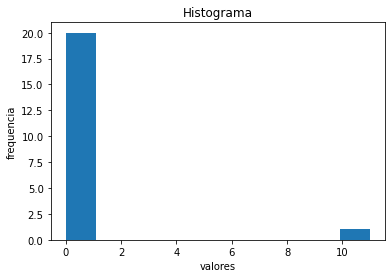

In [11]:
#histograma valores perdidos
missing_val.plot(kind='hist')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

In [12]:
#Porcentaje de valores perdidos
missing_val_percent = 100 * data.isnull().sum() / len(data)
missing_val_percent

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

De lo anterior podemos ver el porcentaje de valores perdidos, en este caos es el 15% de valor perdido en TotalCharges

In [13]:
# Total valores faltantes
total = np.product(data.shape)
total_missing = missing_val.sum()
total_missing


11

In [14]:
# porcentaje de valores faltantes
(total_missing/total) * 100

0.00743730688356558

De lo anterior vemos que el porcentaje de valores faltante es  un porcentaje bajo, siendo esto podemos llenarlo con la media, o dejarlo así, en este caso decidí llenarlo con la media. 

In [15]:
# porcentaje de valores faltantes
(total_missing/total) * 100

0.00743730688356558

#**Llenando valores perdidos**

In [16]:
columnas = data.columns  
columnas

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# Agrupando columnas por tipos
data_type = data.columns.to_series().groupby(data.dtypes).groups
data_type

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges', 'TotalCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object')}

In [18]:
# Columnas categoricas
colums_cat = data_type[np.dtype('object')]  
len(colums_cat)

17

Se tiene 17 columnas categoricas de 21 columnas

In [19]:
# Columnas numericas
columnas = data.columns  
colums_num = list(set(columnas) - set(colums_cat))
len(colums_num)

4

Se tienen 4 columnas numericas de 21 columnas

In [20]:
#llenando valores perdidos con la media. LLenamos solo de la categoria numerica
#De la categoria categorica no tenemos valores perdidos como pudiemos ver atras
for i in colums_num:
    media = data[i].mean()
    data[i] = data[i].fillna(media)

In [21]:
#Verificamos que no hayan valores perdidos o nulos
data.isnull().any().any()

False

Como podemos ver ya no tenemos valores perdidos

In [22]:
#Ahora vamos a ver el balanceo
data.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

Como vemos tenemos 5174 Churn que no se fueron en el ultimo mes y 1869 clientes que si se fueron en e ultimo mes.  Esta diferencia quiere decir que tenemos una cantidad desbalanceada entre los que SI y los que NO.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


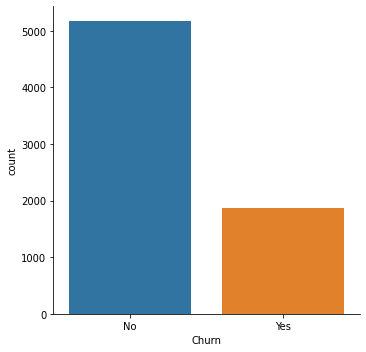

In [23]:
# Visualizacion grafica de las columnas Churn para saber ver la diferencia de la cantidad de personas que se fueron en el último mes. 
sb.factorplot('Churn',data=data,kind="count")


In [24]:
# Porcentaje de cantidad de personas que se fueron en el ultimo mes
100 * data['Churn'].value_counts() / len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Como podemos ver hay un porcentaje evidente, de 73.464% de no abandono y de 26.53% de abandono en el ultimo mes, hay una notable diferencia lo que implica que si este desbalanceado

In [25]:
#Ahora vamos a ver el balanceo en gender
data.groupby('gender').size()

gender
Female    3488
Male      3555
dtype: int64

Como podemos ver es casi igual la cantidad entre estos dos.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


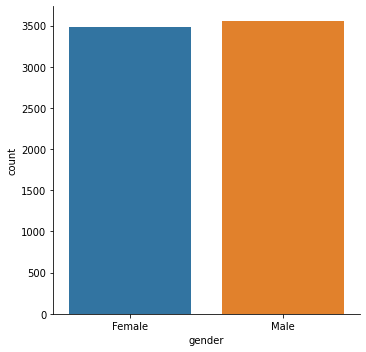

In [26]:
# Visualizacion grafica de las columnas gender
sb.factorplot('gender',data=data,kind="count")

Podemos observar en la grafica que es casi igual de hombres y mujeres

In [27]:
 # tabla de contingencia en porcentajes relativos entre Churn y gender para ver la diferencia de abandono por genero
pd.crosstab(index=data['Churn'], columns=data['gender'] ).apply(lambda r: r/r.sum() *100, axis=0)

gender,Female,Male
Churn,,
No,73.079128,73.839662
Yes,26.920872,26.160338


Como podemos ver el porcentaje de abandono es casi igual de hombres y mujeres. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


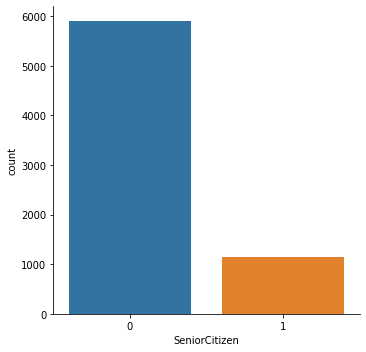

In [28]:
#Aqui podemos ver cuantos hay de SeniorCitiezen
sb.factorplot('SeniorCitizen',data=data,kind="count")

In [29]:
 # tabla de contingencia en porcentajes relativos entre Churn y SeniorCitizen para ver la diferencia de abandono por genero
pd.crosstab(index=data['Churn'], columns=data['SeniorCitizen'] ).apply(lambda r: r/r.sum() *100, axis=0)

SeniorCitizen,0,1
Churn,,
No,76.393832,58.318739
Yes,23.606168,41.681261


Como podemos ver es casi el doble de personas mayores que han abandonado en el ultimo mes.

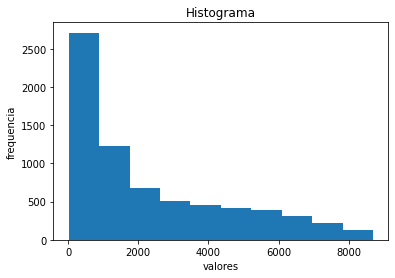

In [30]:
dt = data['TotalCharges']
dt.plot(kind='hist')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

Del grafico anterior podemos ver que hay un maximo de un poco mas de 8000 valores con una frecuencia de un rango entre 0 a 500, y de valores minimos hay se ve que es desde un valor de 0 con una frecuencia entre 0 a 2500 de cargos totales

In [31]:
data['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

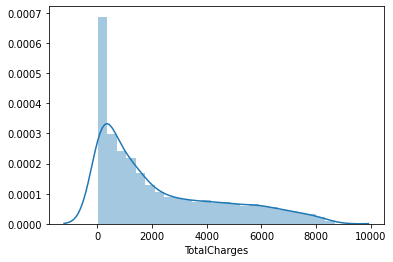

In [32]:
sb.distplot(data['TotalCharges'])
plt.show()

Como podemos ver tenemos una distribucion positiva o skew positiva, porque tiene una curva con inclinacion hacia la izquierda. Asi mismo estamos identificando que existe un conjunto de datos outliers

In [33]:
#Obtenemos el mayor valor de skew
lista_col_num = [col for col in data.columns if data[col].dtype!='object']
lista_col_skew = data[lista_col_num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) 
tabla_skew = pd.DataFrame({'Skew' :lista_col_skew}) 
tabla_skew.head(10)

,Skew
SeniorCitizen,1.833242
TotalCharges,0.962189
tenure,0.239489
MonthlyCharges,-0.220477


Como vemos tenemos como mayor numero de outliers a SeniorCitizen, seguido de TotalCarges

In [34]:
#Reemplazamos los outliers con percentil de 95 
list_col_outliers=['SeniorCitizen','TotalCharges','tenure','MonthlyCharges']
for col in list_col_outliers:
  outliers = data[data[col] > data[col].quantile(.95)].index
  data.loc[outliers,col] = data[col].quantile(.95)

#**Datos Relacionados**

In [35]:
correlation = data.corr()['TotalCharges'].sort_values()
print(correlation)

SeniorCitizen     0.104124
MonthlyCharges    0.643206
tenure            0.830232
TotalCharges      1.000000
Name: TotalCharges, dtype: float64


In [36]:
correlation = data.corr()['SeniorCitizen'].sort_values()
print(correlation)

tenure            0.016567
TotalCharges      0.104124
MonthlyCharges    0.221652
SeniorCitizen     1.000000
Name: SeniorCitizen, dtype: float64


De lo anterior existe una gran correlacion con TotalCharges, y el que mas se acerca a 1 seria el tenure siendo esta una correlacion positiva y significativa, seguido por MonthlyCharges y SeniorCitizen.

In [37]:
data_corr = data[['TotalCharges', 'tenure', 'MonthlyCharges','SeniorCitizen']]
data_corr.head(10)

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen
0,29.85,1.0,29.85,0.0
1,1889.50,34.0,56.95,0.0
2,108.15,2.0,53.85,0.0
3,1840.75,45.0,42.30,0.0
4,151.65,2.0,70.70,0.0
5,820.50,8.0,99.65,0.0
6,1949.40,22.0,89.10,0.0
7,301.90,10.0,29.75,0.0
8,3046.05,28.0,104.80,0.0
9,3487.95,62.0,56.15,0.0


Text(0.5, 1.0, 'MAPA DE CORRELACIONES')

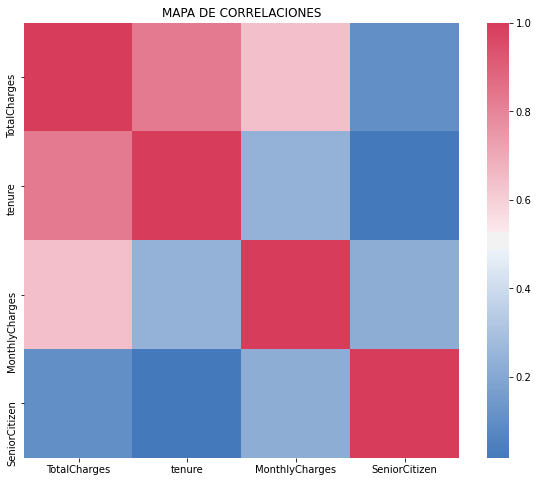

In [38]:
# Grafico de correlaciones entre las variables
f,ax = plt.subplots(figsize=(10, 8)) 
corr = data_corr.corr() 
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(250, 5, as_cmap=True), square=True, ax=ax) 
plt.title("MAPA DE CORRELACIONES")


Del grafico de anterior de correlaciones podemos notar que la correlacion alta es TotalCharges. Las correlaciones SeniorCitizen,MonthlyCharges,tenure son correlaciones positivas, y podemos ver que existe una correlacion mas fuerte entre TotalCharges Y tenure, lo que significa que paga mas con el tiempo, siguiendo de TotalCharges y MonthlyCharges, y por ultimo TotalCharges con SeniorCitizen.

#**Feature Engenering**

Primero se va a explorar los datos de acuerdo a las correlaciones

In [39]:
columns = list(data.columns)
columns



['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [40]:
data['chageDifference'] = data['TotalCharges'] - data['tenure']*data['MonthlyCharges']

In [41]:
data['TotalCharges']  =  data['tenure']*data['MonthlyCharges']

In [42]:
cat_to_nums = {'gender':  {'Female': 0, 'Male': 1},
               'Partner':  {'No': 0, 'Yes': 1},
               'Dependents':  {'No': 0, 'Yes': 1},
               'PhoneService':  {'No': 0, 'Yes': 1},
               'MultipleLines':  {'No phone service': 0,'No': 1, 'Yes': 2},
               'InternetService':  {'No': 0,'DSL': 1, 'Fiber optic': 2},
               'OnlineSecurity':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'OnlineBackup':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'DeviceProtection':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'TechSupport':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'StreamingTV':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'StreamingMovies':  {'No internet service': 0,'No': 1, 'Yes': 2},
               'Contract':  {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
               'PaperlessBilling':  {'No': 0, 'Yes': 1},
               'Churn':  {'No': 0, 'Yes': 1}}
data.replace(cat_to_nums, inplace = True)

LABEL ENCODE

In [43]:
cat_variables = [col for col in data.columns if data[col].dtype == 'object']

In [44]:
#Convertimos las palabras en números con la librería LabelEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for cat in cat_variables:
    le.fit(list(data[cat].values))
    data[cat] = le.transform(data[cat])

#**Normalizamos**

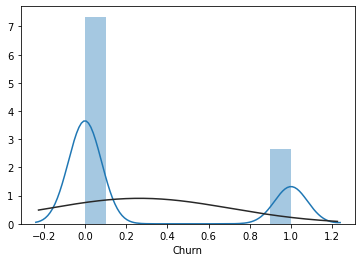

In [45]:
sns.distplot(data['Churn'], fit = norm)

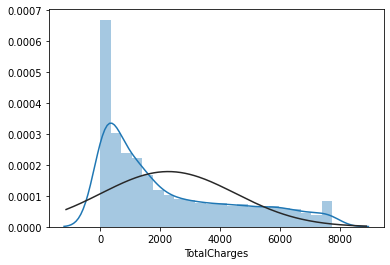

In [46]:
sns.distplot(data['TotalCharges'], fit = norm)

Como podemos ver ya la distribuccion o skew positivo esta con distribucion normal 

In [47]:
colums_num = ['tenure', 'TotalCharges', 'MonthlyCharges']
no_colums_num = list(set(columns) - set(colums_num))
no_colums_num

['PaperlessBilling',
 'DeviceProtection',
 'gender',
 'SeniorCitizen',
 'StreamingMovies',
 'Dependents',
 'InternetService',
 'StreamingTV',
 'PaymentMethod',
 'Partner',
 'TechSupport',
 'MultipleLines',
 'Contract',
 'Churn',
 'customerID',
 'OnlineBackup',
 'PhoneService',
 'OnlineSecurity']

In [48]:
no_num_data = pd.get_dummies(data[no_colums_num], drop_first=True)
no_num_data.sample(5)

,PaperlessBilling,DeviceProtection,gender,SeniorCitizen,StreamingMovies,Dependents,InternetService,StreamingTV,PaymentMethod,Partner,TechSupport,MultipleLines,Contract,Churn,customerID,OnlineBackup,PhoneService,OnlineSecurity
3589,0,1,1,0.0,2,1,1,1,0,1,1,2,0,0,6165,1,1,1
1611,1,2,0,0.0,2,0,1,2,0,1,2,2,2,0,1325,2,1,2
3692,1,2,0,0.0,1,1,1,2,0,1,1,2,0,0,5095,2,1,1
2144,1,1,1,0.0,1,0,1,1,3,0,2,1,0,0,1197,1,1,1
1909,0,0,1,0.0,0,1,0,0,3,1,0,1,1,0,2638,0,1,0


In [49]:
from sklearn.preprocessing import scale
numeric_data = pd.DataFrame(scale(data[colums_num]), index=data.index, columns=colums_num)
numeric_data.head()

,tenure,TotalCharges,MonthlyCharges
0,-1.277445,-1.000654,-1.165793
1,0.066327,-0.147655,-0.255393
2,-1.236724,-0.965821,-0.359534
3,0.514251,-0.162330,-0.747546
4,-1.236724,-0.950743,0.206527


Convertir a una escala estandar 

In [51]:
prepared_data = pd.concat([numeric_data, no_num_data], axis=1, sort=False)
prepared_data.head()

,tenure,TotalCharges,MonthlyCharges,PaperlessBilling,DeviceProtection,gender,SeniorCitizen,StreamingMovies,Dependents,InternetService,StreamingTV,PaymentMethod,Partner,TechSupport,MultipleLines,Contract,Churn,customerID,OnlineBackup,PhoneService,OnlineSecurity
0,-1.277445,-1.000654,-1.165793,1,1,0,0.0,1,0,1,1,2,1,1,0,0,0,5375,2,0,1
1,0.066327,-0.147655,-0.255393,0,2,1,0.0,1,0,1,1,3,0,1,1,1,0,3962,1,1,2
2,-1.236724,-0.965821,-0.359534,1,1,1,0.0,1,0,1,1,3,0,1,1,0,1,2564,2,1,2
3,0.514251,-0.162330,-0.747546,0,2,1,0.0,1,0,1,1,0,0,2,0,1,0,5535,1,0,2
4,-1.236724,-0.950743,0.206527,1,1,0,0.0,1,0,2,1,2,0,1,1,0,1,6511,1,1,1


# **Split train test**

In [53]:
X=data.iloc[:,0:-1]
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4930, 21) (4930,)
(2113, 21) (2113,)


#**Modelo Regresion lineal**

In [ ]:
from sklearn.linear_model import LinearRegression
lineal = LinearRegression()
lineal.fit(X_train,y_train) 
predicciones_lineal = lineal.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('La cantidad de error de la Regresión Lineal es :{0:.8f}'.format(np.sqrt(mean_squared_error(y_test,predicciones_lineal))))

In [ ]:
"CELDA N°39"
#Graficamos en el eje X las predicciones de la Regresión Lineal y en el eje Y los datos reales 
plt.figure(figsize=(9,6))
plt.xlabel('Regresión Lineal')
plt.ylabel('Datos reales')
sns.regplot(x=predicciones_lineal,y=y_test)

In [ ]:
# datos importando la librería ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.0005,l1_ratio=0.5) 
elastic.fit(X_train,y_train)
predicciones_elastic = elastic.predict(X_test) 

In [ ]:
print('El error de la Regresión ElasticNet es :{0:.8f}'.format(np.sqrt(mean_squared_error(y_test,predicciones_elastic))))

In [ ]:

plt.figure(figsize=(9,6))
plt.xlabel('Regresión ElasticNet')
plt.ylabel('Datos reales')
sns.regplot(x=predicciones_elastic,y=y_test)

# **Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1,max_depth=3,random_state=1)
rnd_clf.fit(X_train,y_train)
PREDICCIONES_2 = rnd_clf.predict(X_test)

[]

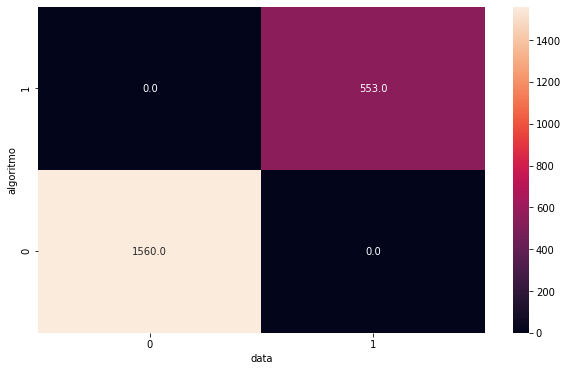

In [62]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,PREDICCIONES_2)
plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('data')
plt.ylabel('algoritmo')
plt.plot()